In [46]:
import numpy as np
import matplotlib.pyplot as plt
import xtrack as xt
import xcoll as xc
import json
import pandas as pd

In [47]:
def install_tidp(line, block_mvt=29e-3):
    tidp_ap_tot = 147e-3
    line.discard_tracker()
    tidp = xc.EverestCollimator(length=4.3, material=xc.materials.Carbon, jaw_L= tidp_ap_tot/2 + block_mvt, jaw_R = -tidp_ap_tot/2 + block_mvt)
    line.collimators.install(names=['tidp.11434'], elements=[tidp])
    return tidp

In [48]:
line = xt.Line.from_json('../../injection_lines/sps_with_aperture_inj_q20_beam_sagitta5.json')
tidp = install_tidp(line)

tt = line.get_table()
tw = line.twiss()

Loading line from dict:   0%|          | 0/36404 [00:00<?, ?it/s]

Done loading line from dict.           


Slicing line:   0%|          | 0/33012 [00:00<?, ?it/s]

In [49]:
line.element_names[3772]

'bpcn.12508.a_aper'

# Elements

In [6]:
counts_start = {}
for i in range(330):
    with open(f'counts_json_files/counts_start_{i}.json', 'r') as f:
        counts_start[i] = json.load(f)

In [20]:
line.get_s_position(line.element_names[0])

0.0

In [8]:
counts_start[0]

{'at_element': {'values': [3772], 'counts': [100]},
 'at_turn': {'values': [2884, 2885, 2886], 'counts': [30, 20, 50]}}

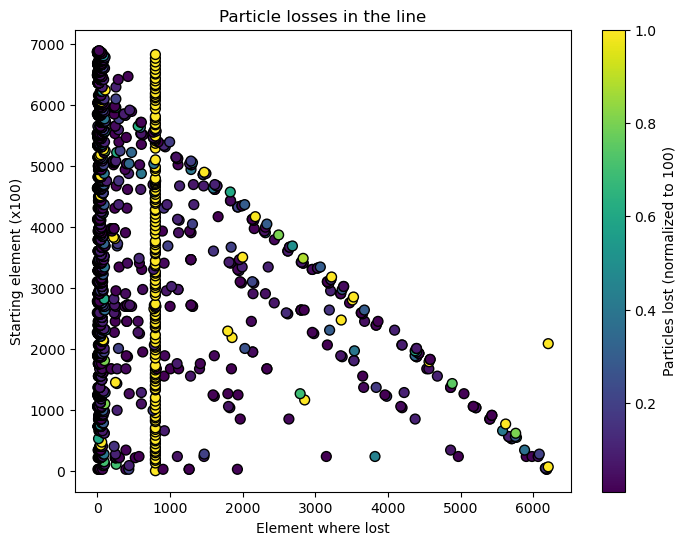

In [29]:
x_all = []
y_all = []
c_all = []

for I, data in counts_start.items():
    start_element = I * 100
    s_start = line.get_s_position(line.element_names[start_element])
    values = data['at_element']['values']
    element_positions_lost = [line.get_s_position(line.element_names[i]) for i in values]
    counts = data['at_element']['counts']
    
    # x_all.extend(values)
    # y_all.extend([start_element] * len(values))

    x_all.extend(element_positions_lost)
    y_all.extend([s_start] * len(values))
    c_all.extend([count / 100 for count in counts])  # normalized color

# Convert to arrays for convenience
x_all = np.array(x_all)
y_all = np.array(y_all)
c_all = np.array(c_all)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(x_all, y_all, c=c_all, cmap='viridis', s=50, edgecolor='k')
plt.colorbar(scatter, label='Particles lost (normalized to 100)')
plt.xlabel('Element where lost')
plt.ylabel('Starting element (x100)')
plt.title('Particle losses in the line')
plt.show()

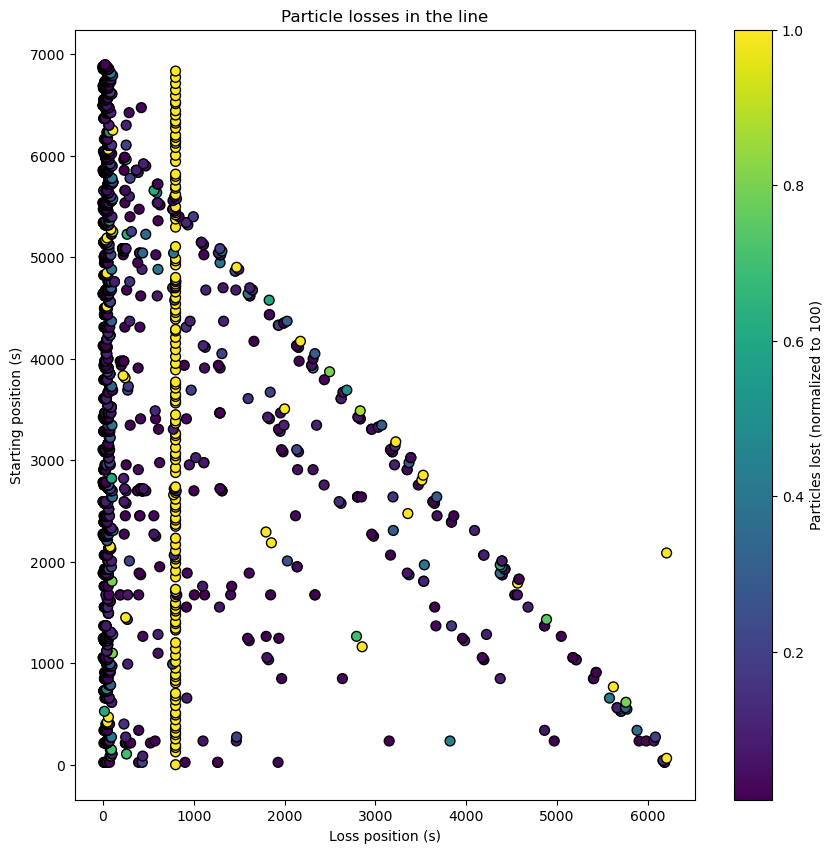

In [33]:
plt.figure(figsize=(10, 10))
scatter = plt.scatter(x_all, y_all, c=c_all, cmap='viridis', s=50, edgecolor='k')
plt.colorbar(scatter, label='Particles lost (normalized to 100)')
plt.xlabel('Loss position (s)')
plt.ylabel('Starting position (s)')
plt.title('Particle losses in the line')
plt.show()

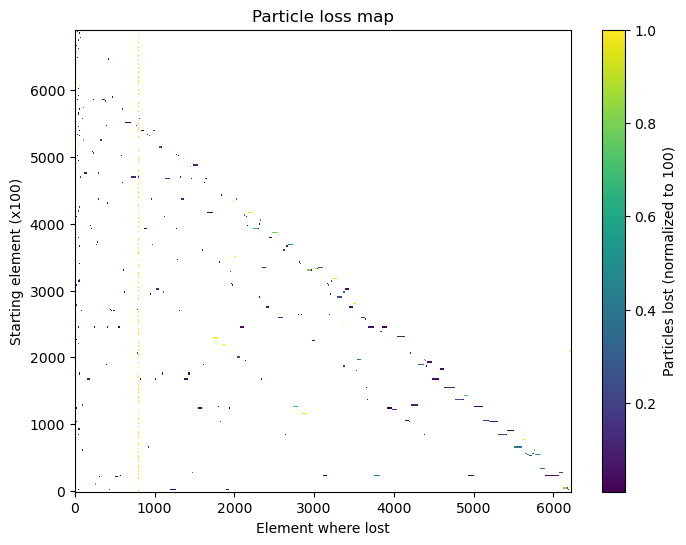

In [40]:
x_unique = np.unique(x_all)
y_unique = np.unique(y_all)

X, Y = np.meshgrid(x_unique, y_unique)
Z = np.zeros_like(X, dtype=float)

# Fill Z with counts
for x, y, c in zip(x_all, y_all, c_all):
    ix = np.where(x_unique == x)[0][0]
    iy = np.where(y_unique == y)[0][0]
    Z[iy, ix] += c  # accumulate counts

Z_masked = np.where(Z == 0, np.nan, Z)


# Compute bin edges from centers
def make_edges(arr):
    arr = np.sort(np.unique(arr))
    edges = (arr[:-1] + arr[1:]) / 2
    edges = np.concatenate(([arr[0] - (edges[0] - arr[0])], edges, [arr[-1] + (arr[-1] - edges[-1])]))
    return edges

x_edges = make_edges(x_unique)
y_edges = make_edges(y_unique)

# Mask zero values
Z_masked = np.where(Z == 0, np.nan, Z)

plt.figure(figsize=(8, 6))
pcm = plt.pcolormesh(x_edges, y_edges, Z_masked, cmap='viridis', shading='flat')
plt.colorbar(pcm, label='Particles lost (normalized to 100)')
plt.xlabel('Element where lost')
plt.ylabel('Starting element (x100)')
plt.title('Particle loss map')
plt.show()

In [42]:
tw = line.twiss()

In [45]:
tw.T_rev0

np.float64(2.3069394777984133e-05)

In [50]:
len(line.element_names)

33012

In [ ]:
tt = line.get_table()

In [51]:
line.element_names[3772]

'bpcn.12508.a_aper'

In [52]:
line['bpcn.12508.a_aper']

View of LimitEllipse(a=0.038, b=0.038)

In [53]:
line.get_s_position('bpcn.12508.a_aper')

np.float64(799.5901999999999)

In [54]:
tt = line.get_table()

In [55]:
tw = line.twiss()

In [56]:
np.max(tw.dx)

np.float64(7.96275052845422)

In [57]:
np.argmax(tw.dx)

np.int64(10993)

In [59]:
line.element_names[10993]

'qf.30010'

In [60]:
tt.rows['veqf.*']

Table: 203 rows, 11 cols
name                          s element_type isthick isreplica parent_name iscollective ...
veqf.10010.b_aper        3.2504 LimitEllipse   False     False None               False
veqf.10210.a_aper        63.901 LimitEllipse   False     False None               False
veqf.10210.b_aper       67.2458 LimitEllipse   False     False None               False
veqf.10410.a_aper       127.896 LimitEllipse   False     False None               False
veqf.10410.b_aper       131.241 LimitEllipse   False     False None               False
veqf.10610.a_aper       191.892 LimitEllipse   False     False None               False
veqf.10610.b_aper       195.237 LimitEllipse   False     False None               False
veqf.10810.a_aper       255.887 LimitEllipse   False     False None               False
veqf.10810.b_aper       259.232 LimitEllipse   False     False None               False
veqf.11010.a_aper       319.883 LimitEllipse   False     False None               False
...

In [61]:
line['veqf.10010.b_aper']

View of LimitEllipse(a=0.076, b=0.0208)

In [62]:
tt.rows['veqd.*']

Table: 201 rows, 11 cols
name                          s element_type isthick isreplica parent_name iscollective ...
veqd.10110.a_aper       31.9033 LimitEllipse   False     False None               False
veqd.10110.b_aper       35.2481 LimitEllipse   False     False None               False
veqd.10310.a_aper       95.8987 LimitEllipse   False     False None               False
veqd.10310.b_aper       99.2435 LimitEllipse   False     False None               False
veqd.10510.a_aper       159.894 LimitEllipse   False     False None               False
veqd.10510.b_aper       163.239 LimitEllipse   False     False None               False
veqd.10710.a_aper       223.889 LimitEllipse   False     False None               False
veqd.10710.b_aper       227.234 LimitEllipse   False     False None               False
veqd.10910.a_aper       287.885 LimitEllipse   False     False None               False
veqd.10910.b_aper        291.23 LimitEllipse   False     False None               False
...

In [63]:
line['veqd.10110.a_aper']

View of LimitEllipse(a=0.0415, b=0.0415)